In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os, locale, pathlib
import sys
from GACPD.GACPD import  GACPD

In [4]:
print("CWD:", pathlib.Path.cwd())
print("FS encoding:", sys.getfilesystemencoding())
print("Preferred encoding:", locale.getpreferredencoding(False))
print("stdin/out/err:", getattr(sys.stdin, "encoding", None),
      getattr(sys.stdout, "encoding", None), getattr(sys.stderr, "encoding", None))
print("PYTHONUTF8:", os.environ.get("PYTHONUTF8"))
print("PYTHONIOENCODING:", os.environ.get("PYTHONIOENCODING"))

token_list = []
token_file = 'tokens.txt'

if not os.path.exists("reports"):
    os.mkdir("reports")

if not os.path.exists("src"):
    os.mkdir("src")

if not os.path.exists("cmp"):
    os.mkdir("cmp")

print(os.getcwd())

with open(token_file, 'r') as f:
    for line in f.readlines():
        token_list.append(line.strip('\n'))

CWD: C:\Users\dgonz\Desktop\GACPD
FS encoding: utf-8
Preferred encoding: cp1252
stdin/out/err: utf-8 UTF-8 UTF-8
PYTHONUTF8: None
PYTHONIOENCODING: UTF-8
C:\Users\dgonz\Desktop\GACPD


In [4]:
data = ('5M', 'apache/kafka', 'linkedin/kafka', token_list, '', '')

In [5]:
example = GACPD(data)

In [6]:
example.get_dates()

The divergence_date of the repository linkedin/kafka is 2022-06-02T17:08:43Z and the cut_off_date is 2025-09-10T17:54:39Z.
The variant2 is ==>
	 Ahead by 471 commits
	 Behind by 7119 commits
Select an interval within the period [2022-06-02T17:08:43Z, 2025-09-10T17:54:39Z] to limit the patches being checked.


In [7]:
# prs_source = example.extractPatches('2018-08-28T17:08:43Z', '2022-06-02T17:08:43Z')
prs_source = example.extractPatches('2022-06-08T17:08:43Z', '2022-06-22T17:08:43Z')

Extracting patches between 2022-06-08T17:08:43Z and 2022-06-22T17:08:43Z...
Not outputting obtained issues - just getting issue count
12333,2022-06-22T13:43:45Z,MINOR: fix `LogCleanerManagerTest.testLogsUnderCleanupIneligibleForCompaction()` for `Defaults.LogMessageTimestampType = "LogAppendTime"`
12329,2022-06-22T02:53:01Z,KAFKA-14010: AlterPartition request won't retry when receiving retriable error
12325,2022-06-21T19:34:52Z,MINOR: Fix static mock usage in StateStoreMetricsTest
12323,2022-06-21T14:34:33Z,MINOR: Fix static mock usage in ProcessorNodeMetricsTest
12322,2022-06-21T13:33:54Z,MINOR: Fix static mock usage in NamedCacheMetricsTest
12320,2022-06-21T11:08:25Z,KAFKA-13702: Connect RestClient overrides response status code on request failure
12317,2022-06-21T06:50:54Z,MINOR: Fix AlterPartitionManager topic id handling in response handler
12295,2022-06-15T01:24:08Z,KAFKA-13586: Prevent exception thrown during connector update from crashing distributed herder
12290,2022-06-14T01:

# Done. Printed 13 PRs.


In [8]:
example.dfPatches()

,Patch number,Patch title
0,12333,MINOR: fix `LogCleanerManagerTest.testLogsUnde...
1,12329,KAFKA-14010: AlterPartition request won't retr...
2,12325,MINOR: Fix static mock usage in StateStoreMetr...
3,12323,MINOR: Fix static mock usage in ProcessorNodeM...
4,12322,MINOR: Fix static mock usage in NamedCacheMetr...
5,12320,KAFKA-13702: Connect RestClient overrides resp...
6,12317,MINOR: Fix AlterPartitionManager topic id hand...
7,12295,KAFKA-13586: Prevent exception thrown during c...
8,12290,MINOR: Stop leaking threads in BlockingConnect...
9,12289,KAFKA-13957: Fix flaky shouldQuerySpecificActi...


Fetching files and commit information from patches...
string indices must be integers, not 'str'
This should only happen if there are no files changed in a pull request
---27.854329109191895 seconds ---
Repository created at: 2018-08-31T21:32:03Z

Starting classification for apache/kafka, - , linkedin/kafka...

Bar plot of the patch classifications for apache/kafka -> linkedin/kafka


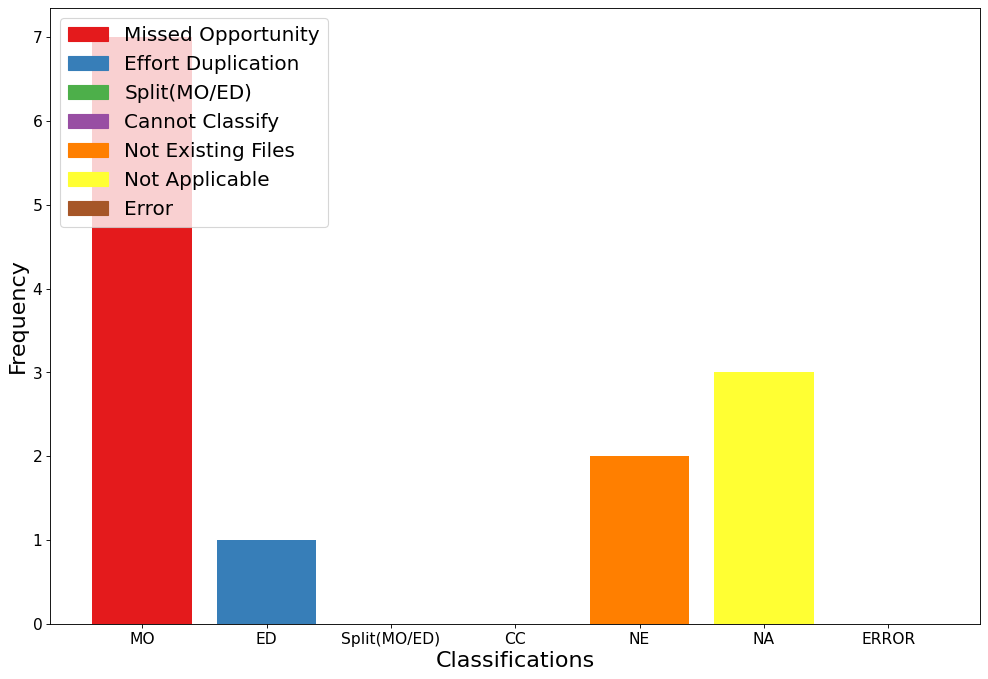

In [9]:
example.runClassification(prs_source)

In [10]:
# example.dfPatchClass().to_csv('results-50-40-30-fullAll.csv')
# example.dfFileClass()
# example.dfFileClass().to_csv('GACPD-50-40-30-fullAll.csv')

In [11]:
for i in range(0, len(example.cycles)):
    print(example.cycles[i])

['streams/src/test/java/org/apache/kafka/streams/state/internals/SegmentIteratorTest.java', 'streams/src/test/java/org/apache/kafka/streams/state/internals/KeyValueSegmentIteratorTest.java', 'streams/src/test/java/org/apache/kafka/streams/state/internals/SegmentIteratorTest.java']
['core/src/main/scala/kafka/server/BrokerToControllerChannelManager.scala', 'core/src/main/scala/kafka/server/BrokerToControllerChannelManagerImpl.scala', 'core/src/main/scala/kafka/server/BrokerToControllerChannelManager.scala']


In [12]:
example.create_dynamic_js()
# TO view results run this on the terminal: python3 -m http.server 8000
# TO end server session just ctrl + c

✅ JavaScript file written to: dynamic_boxes.js
